## Index for PCA_labour_prod_edu.ipynb code

Description: PCA using Labour data, production data and education data. 

#### 1. Analysis for Nuts4

1.1 **Processing Education Data**
   - Load and preprocess education data.
   - Perform necessary transformations and calculations.

1.2 **Processing Labour Data**
   - Load and preprocess labour data.
   - Apply filtering and data transformations.

1.3 **Processing Production Data**
   - Load and preprocess production data.
   - Compute necessary metrics or values.

#### 2. RUN PCA Combined the data

- **PCA on Combined Data**
  - Standardize the combined dataset.
  - Perform PCA to reduce dimensionality.
  - Analyze principal components and variance explained.



### 1. Analysis for Nuts4

In [119]:
# Load the datasets. 
import pandas as pd

education_NUTS4_df = pd.read_csv('../CSVs/Education_NUTS4_2019.csv')
education_NUTS4_df.fillna('None', inplace=True)
labour_NUTS4_df = pd.read_csv('../CSVs/Labour_NUTS4_2019.csv', sep=",")
prod4_df = pd.read_csv('../CSVs/Production_NUTS4_2019.csv', sep=",")

#### 1.1 We will process the data of education

In [120]:
# Definir el mapeo de NutsID a nombres de región
nuts_to_region = {
    '11': 'Norte',
    '15': 'Algarve',
    '16': 'Centro',
    '17': 'Lisboa',
    '18': 'Alentejo',
    '20': 'Açores',
    '30': 'Madeira'
}

# Crear una función para extraer los nombres de región de los códigos NutsID
def get_region_name(nutsid):
    # Extraer los primeros 3 caracteres del NutsID para el mapeo
    prefix = nutsid[:2]
    # Devolver el nombre de la región correspondiente
    return nuts_to_region.get(prefix, 'Unknown')

# Añadir una nueva columna al DataFrame con los nombres de región
education_NUTS4_df['region_name_nuts2'] = education_NUTS4_df['NutsID'].apply(get_region_name)

# Imprimir las primeras filas del DataFrame resultante
education_NUTS4_df.head(309)

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,region_name_nuts2
0,1111601,Arcos de Valdevez,4,2019,4512,Total,Norte
1,1111602,Caminha,4,2019,968,Total,Norte
2,1111603,Melgaço,4,2019,2360,Total,Norte
3,1111604,Monção,4,2019,4341,Total,Norte
4,1111605,Paredes de Coura,4,2019,1995,Total,Norte
...,...,...,...,...,...,...,...
304,3003108,Santa Cruz,4,2019,3808,Total,Madeira
305,3003109,Santana,4,2019,3883,Total,Madeira
306,3003110,São Vicente,4,2019,2753,Total,Madeira
307,3003201,Porto Santo,4,2019,320,Total,Madeira


In [121]:
def ed_percentage(row):
    id = row['NutsID']
    value = row['e.value']
    total = education_NUTS4_df[(education_NUTS4_df['NutsID'] == id) & (education_NUTS4_df['el.education_level'] == 'Total')]['e.value'].values[0]
    if total == 0:
        return 0
    else:
        return (value / total) * 100

# Filter out rows where education_level is not 'Total'
education_NUTS4_df_no_totals = education_NUTS4_df[education_NUTS4_df['el.education_level'] != 'Total'].copy()

# Apply the ed_percentage function to calculate percentages
education_NUTS4_df_no_totals['ed_level_perc'] = education_NUTS4_df_no_totals.apply(ed_percentage, axis=1)

education_NUTS4_df_no_totals.head(1000)

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,region_name_nuts2,ed_level_perc
308,1111601,Arcos de Valdevez,4,2019,902,None,Norte,19.991135
309,1111602,Caminha,4,2019,141,None,Norte,14.566116
310,1111603,Melgaço,4,2019,346,None,Norte,14.661017
311,1111604,Monção,4,2019,616,None,Norte,14.190279
312,1111605,Paredes de Coura,4,2019,323,None,Norte,16.190476
...,...,...,...,...,...,...,...,...
1303,11D1807,Moimenta da Beira,4,2019,181,Superior,Norte,8.846530
1304,11D1812,Penedono,4,2019,171,Superior,Norte,11.593220
1305,11D1815,São João da Pesqueira,4,2019,494,Superior,Norte,12.122699
1306,11D1818,Sernancelhe,4,2019,186,Superior,Norte,9.877854


#### 1.2 We will process the data of labour

In [122]:
# Definir el mapeo de NutsID a nombres de región
nuts_to_region = {
    '11': 'Norte',
    '15': 'Algarve',
    '16': 'Centro',
    '17': 'Lisboa',
    '18': 'Alentejo',
    '20': 'Açores',
    '30': 'Madeira'
}

# Crear una función para extraer los nombres de región de los códigos NutsID
def get_region_name(nutsid):
    # Extraer los primeros 3 caracteres del NutsID para el mapeo
    prefix = nutsid[:2]
    # Devolver el nombre de la región correspondiente
    return nuts_to_region.get(prefix, 'Unknown')

# Añadir una nueva columna al DataFrame con los nombres de región
labour_NUTS4_df['region_name_nuts2'] = labour_NUTS4_df['NutsID'].apply(get_region_name)

# Imprimir las primeras filas del DataFrame resultante
labour_NUTS4_df.head(10)


,NutsID,region_name,NUTS_level,l.year,l.value,ltn.type_labour,region_name_nuts2
0,1111601,Arcos de Valdevez,4,2019,2087,Total labour force in agriculture,Norte
1,1111601,Arcos de Valdevez,4,2019,1935,Family labour force,Norte
2,1111601,Arcos de Valdevez,4,2019,1046,Holder,Norte
3,1111601,Arcos de Valdevez,4,2019,626,Spouse,Norte
4,1111601,Arcos de Valdevez,4,2019,263,Other family members,Norte
5,1111601,Arcos de Valdevez,4,2019,152,Non-family labour force,Norte
6,1111601,Arcos de Valdevez,4,2019,75,Regular,Norte
7,1111601,Arcos de Valdevez,4,2019,65,Non-regular,Norte
8,1111601,Arcos de Valdevez,4,2019,11,Workers not hired by the holder,Norte
9,1111602,Caminha,4,2019,407,Total labour force in agriculture,Norte


In [123]:
lab_no_totals = labour_NUTS4_df[labour_NUTS4_df['ltn.type_labour'] != 'Total labour force in agriculture'].copy()
lab_totals =labour_NUTS4_df[(labour_NUTS4_df['ltn.type_labour'] == 'Family labour force') |
                        (labour_NUTS4_df['ltn.type_labour'] == 'Non-family labour force')].copy()
lab_split_totals = labour_NUTS4_df[(labour_NUTS4_df['ltn.type_labour'] != 'Total labour force in agriculture') & 
                              (labour_NUTS4_df['ltn.type_labour'] != 'Family labour force') &
                              (labour_NUTS4_df['ltn.type_labour'] != 'Non-family labour force')].copy()

In [124]:
lab_totals = lab_totals.groupby(['NutsID', 'region_name', 'region_name_nuts2'])['l.value'].sum().reset_index()
lab_split_totals = lab_split_totals.groupby(['NutsID', 'region_name', 'region_name_nuts2'])['l.value'].sum().reset_index()

In [125]:
def lab_percentage(row):
    id = row['NutsID']
    value = row['l.value']
    
    if row['ltn.type_labour'] in ['Family labour force', 'Non-family labour force']:
        total_row = lab_totals[lab_totals['NutsID'] == id]
    else:
        total_row = lab_split_totals[lab_split_totals['NutsID'] == id]
        
    if not total_row.empty:
        total = total_row['l.value'].values[0]
    else:
        return None
    if total == 0:
        return None
    else:
        return round((value / total) * 100, 2)

In [126]:
# Calculate the percentage of each labor type within each region
labour_NUTS4_df['percentage_labor'] = lab_no_totals.apply(lab_percentage, axis=1)
labour_NUTS4_df = labour_NUTS4_df[labour_NUTS4_df['ltn.type_labour'] != 'Total labour force in agriculture'].copy()
labour_NUTS4_df.head(10)

,NutsID,region_name,NUTS_level,l.year,l.value,ltn.type_labour,region_name_nuts2,percentage_labor
1,1111601,Arcos de Valdevez,4,2019,1935,Family labour force,Norte,92.72
2,1111601,Arcos de Valdevez,4,2019,1046,Holder,Norte,50.14
3,1111601,Arcos de Valdevez,4,2019,626,Spouse,Norte,30.01
4,1111601,Arcos de Valdevez,4,2019,263,Other family members,Norte,12.61
5,1111601,Arcos de Valdevez,4,2019,152,Non-family labour force,Norte,7.28
6,1111601,Arcos de Valdevez,4,2019,75,Regular,Norte,3.60
7,1111601,Arcos de Valdevez,4,2019,65,Non-regular,Norte,3.12
8,1111601,Arcos de Valdevez,4,2019,11,Workers not hired by the holder,Norte,0.53
10,1111602,Caminha,4,2019,326,Family labour force,Norte,80.10
11,1111602,Caminha,4,2019,159,Holder,Norte,38.97


#### 1.3 We will process the data of production

In [127]:
# Definir el mapeo de NutsID a nombres de región
nuts_to_region = {
    '11': 'Norte',
    '15': 'Algarve',
    '16': 'Centro',
    '17': 'Lisboa',
    '18': 'Alentejo',
    '20': 'Açores',
    '30': 'Madeira'
}

# Crear una función para extraer los nombres de región de los códigos NutsID
def get_region_name(nutsid):
    # Extraer los primeros 3 caracteres del NutsID para el mapeo
    prefix = nutsid[:2]
    # Devolver el nombre de la región correspondiente
    return nuts_to_region.get(prefix, 'Unknown')

# Añadir una nueva columna al DataFrame con los nombres de región
prod4_df['region_name_nuts2'] = prod4_df['NutsID'].apply(get_region_name)

# Imprimir las primeras filas del DataFrame resultante
prod4_df.head(10)


,NutsID,region_name,NUTS_level,p.year,p.value_eur,p.area_ha,region_name_nuts2
0,1111601,Arcos de Valdevez,4,2019,11530051,551.5,Norte
1,1111602,Caminha,4,2019,3015466,1058.6,Norte
2,1111603,Melgaço,4,2019,5191947,494.9,Norte
3,1111604,Monção,4,2019,9358899,1577.4,Norte
4,1111605,Paredes de Coura,4,2019,5383718,1276.3,Norte
5,1111606,Ponte da Barca,4,2019,4831458,572.9,Norte
6,1111607,Ponte de Lima,4,2019,20001117,2566.9,Norte
7,1111608,Valença,4,2019,4101833,2858.9,Norte
8,1111609,Viana do Castelo,4,2019,16334535,2145.3,Norte
9,1111610,Vila Nova de Cerveira,4,2019,2058865,1676.6,Norte


### 2. RUN PCA Combined the data

In [128]:
### Merge the dataframes

### The PCA is based on the results of the correlation and regression:
# Labour only with: Superior-Family labour force  R2 = 0.285982
# p.value_eur-Family labour force  R2 = 0.247524

labour_NUTS4_df =labour_NUTS4_df[labour_NUTS4_df['ltn.type_labour'] == 'Family labour force']
education_NUTS4_df_no_totals = education_NUTS4_df_no_totals[education_NUTS4_df_no_totals['el.education_level'] == 'Superior']

df_merged = education_NUTS4_df_no_totals.merge(education_NUTS4_df_no_totals[['NutsID', 'ed_level_perc']], on='NutsID')
df_merged = df_merged.merge(prod4_df[['NutsID', 'p.value_eur']], on='NutsID', how='left')
df_merged = df_merged.merge(labour_NUTS4_df[['NutsID','ltn.type_labour','percentage_labor']], on='NutsID')


df_merged


,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,region_name_nuts2,ed_level_perc_x,ed_level_perc_y,p.value_eur,ltn.type_labour,percentage_labor
0,1111601,Arcos de Valdevez,4,2019,286,Superior,Norte,6.338652,6.338652,11530051,Family labour force,92.72
1,1111602,Caminha,4,2019,85,Superior,Norte,8.780992,8.780992,3015466,Family labour force,80.10
2,1111603,Melgaço,4,2019,261,Superior,Norte,11.059322,11.059322,5191947,Family labour force,89.68
3,1111604,Monção,4,2019,447,Superior,Norte,10.297167,10.297167,9358899,Family labour force,87.86
4,1111605,Paredes de Coura,4,2019,108,Superior,Norte,5.413534,5.413534,5383718,Family labour force,94.16
...,...,...,...,...,...,...,...,...,...,...,...,...
303,3003107,Ribeira Brava,4,2019,265,Superior,Madeira,7.354982,7.354982,7273488,Family labour force,83.80
304,3003108,Santa Cruz,4,2019,379,Superior,Madeira,9.952731,9.952731,19846180,Family labour force,85.45
305,3003109,Santana,4,2019,374,Superior,Madeira,9.631728,9.631728,15924669,Family labour force,89.05
306,3003110,São Vicente,4,2019,266,Superior,Madeira,9.662187,9.662187,8351159,Family labour force,90.80


In [129]:
# Seleccionar columnas específicas del DataFrame
df_merged_selection = df_merged[['NutsID', 'ed_level_perc_y', 'p.value_eur', 'percentage_labor','region_name_nuts2']]

df_merged_selection

,NutsID,ed_level_perc_y,p.value_eur,percentage_labor,region_name_nuts2
0,1111601,6.338652,11530051,92.72,Norte
1,1111602,8.780992,3015466,80.10,Norte
2,1111603,11.059322,5191947,89.68,Norte
3,1111604,10.297167,9358899,87.86,Norte
4,1111605,5.413534,5383718,94.16,Norte
...,...,...,...,...,...
303,3003107,7.354982,7273488,83.80,Madeira
304,3003108,9.952731,19846180,85.45,Madeira
305,3003109,9.631728,15924669,89.05,Madeira
306,3003110,9.662187,8351159,90.80,Madeira


In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define a function to display correlation dots
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm", vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,], xycoords="axes fraction", ha='center', va='center', fontsize=font_size)

# Assuming df_merged is your combined dataframe
df_merged_selection = df_merged[['NutsID', 'ed_level_perc_y', 'p.value_eur', 'percentage_labor', 'region_name_nuts2']]

# Ensure no NaN values
df_merged_nona = df_merged_selection.dropna()

# Separate the numerical data for standardization
numerical_data = df_merged_nona[['ed_level_perc_y', 'p.value_eur', 'percentage_labor']]
categorical_data = df_merged_nona[['region_name_nuts2']]

# Standardize the numerical data
df_scaled = StandardScaler().fit_transform(numerical_data)

# Perform PCA
pca = PCA(n_components=2)
PC = pca.fit_transform(df_scaled)


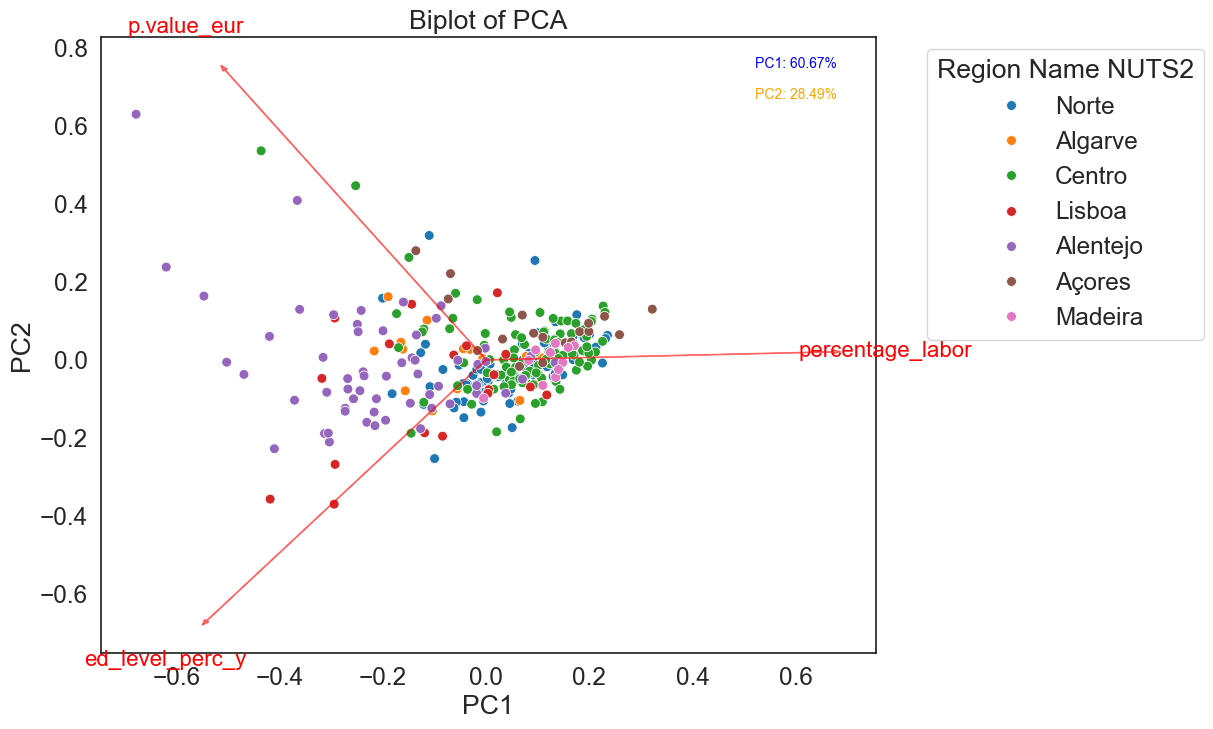

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the biplot function with percentage contributions
def biplot(score, coef, hue, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coef.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    scatter = sns.scatterplot(x=xs * scalex, y=ys * scaley, hue=hue, s=50, palette='tab10')
    
    # Calculate the percentage contribution of each PC
    explained_variance_ratio = pca.explained_variance_ratio_
    pc1_contrib = explained_variance_ratio[0] * 100
    pc2_contrib = explained_variance_ratio[1] * 100
    
    # Add annotations for PC contributions
    plt.text(0.95, 0.95, f'PC1: {pc1_contrib:.2f}%', transform=plt.gca().transAxes, fontsize=10, ha='right', color='blue')
    plt.text(0.95, 0.90, f'PC2: {pc2_contrib:.2f}%', transform=plt.gca().transAxes, fontsize=10, ha='right', color='orange')
    
    for i in range(n):
        plt.arrow(0, 0, coef[i, 0], coef[i, 1], color='red', alpha=0.5, head_width=0.01)
        plt.text(coef[i, 0] * 1.15, coef[i, 1] * 1.15, labels[i], color='red', ha='center', va='center', fontsize='small')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title('Biplot of PCA')
    plt.grid(False)
    plt.legend(title='Region Name NUTS2', bbox_to_anchor=(1.05, 1), loc='upper left')
    
# Display the biplot
plt.figure(figsize=(10, 8))
biplot(PC, np.transpose(pca.components_), categorical_data['region_name_nuts2'], list(numerical_data.columns))
plt.show()






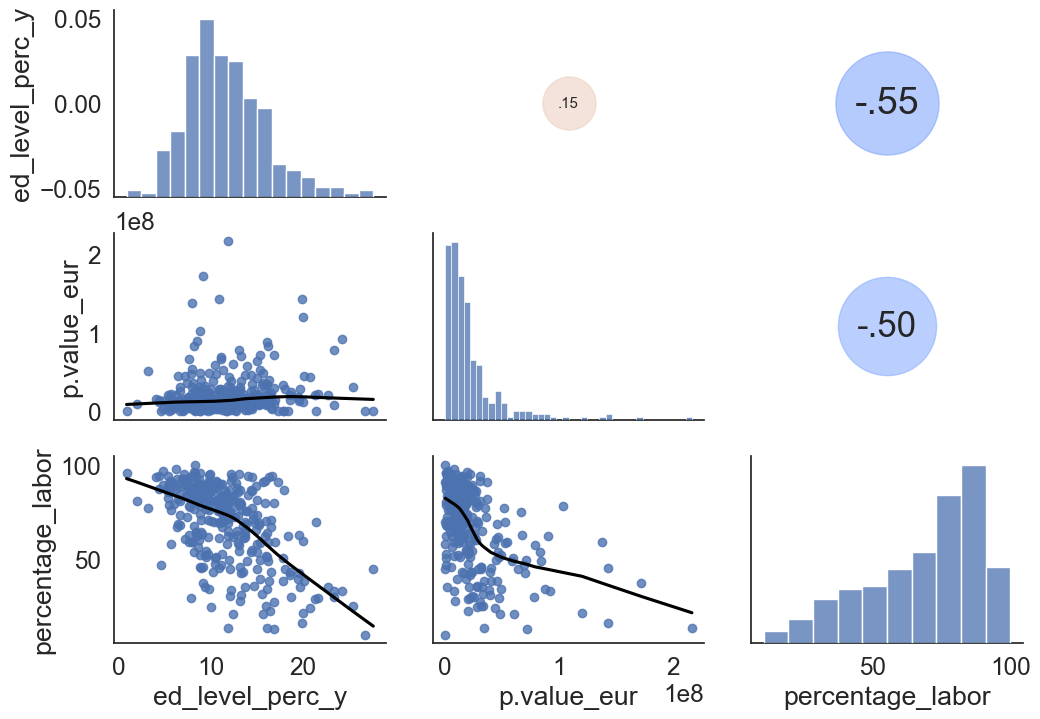

In [132]:
# Create the pair plot with regression and correlation dots
sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(df_merged_nona, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.histplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)
plt.show()
